<a href="https://colab.research.google.com/github/KhushbooJain0618/ML-PRACTICE/blob/main/ML2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
!pip install kaggle

In [126]:
!pip install --user kaggle

In [127]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [128]:
!kaggle datasets download -d wobotintelligence/face-mask-detection-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [129]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [130]:
# import zipfile
# zip_ref = zipfile.ZipFile('/content/face-mask-detection-dataset.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [131]:
#steps

#0. Preprocess + EDA + Feature Selection
#1. Extract input and output cols
#2. Scale the values
#3. Train test split
#4. Train the model
#5. Evaluate the model/model selection
#6. Model deployment

In [132]:
import numpy as np
import pandas as pd

In [133]:
df = pd.read_csv('/content/placement.csv')

In [134]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [135]:
df.shape

(1000, 3)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [137]:
import matplotlib.pyplot as plt

In [138]:
df.rename(columns={'placement_exam_marks' : 'marks'}, inplace=True)

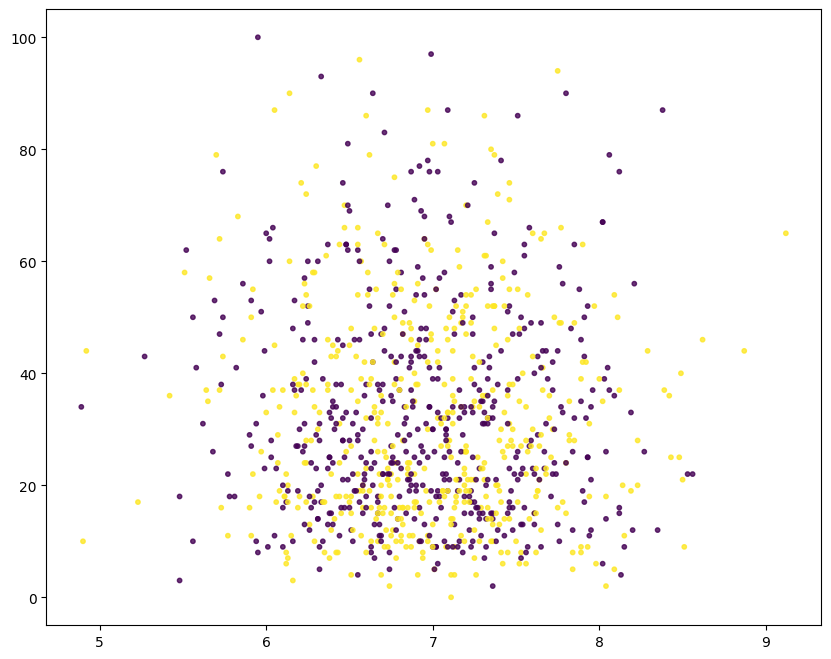

In [139]:
plt.figure(figsize=(10,8))
plt.scatter(df['cgpa'], df['marks'], c = df['placed'], s=10, alpha=0.8)
plt.show()

In [140]:
#now we will extract all rows with 1st and 2nd col as x and all rows and 3rd col as y

x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [141]:
x.shape

(1000, 2)

In [142]:
y.shape

(1000,)

In [143]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=42)

In [144]:
x_train, x_test, y_train, y_test

(     cgpa  marks
 608  7.33   16.0
 314  7.43   14.0
 738  7.04   17.0
 404  8.02   35.0
 318  6.74   60.0
 ..    ...    ...
 369  6.69   36.0
 148  6.86   49.0
 456  6.76   12.0
 245  6.78   62.0
 453  7.31   24.0
 
 [900 rows x 2 columns],
      cgpa  marks
 669  6.94    8.0
 841  7.45   27.0
 510  6.84   34.0
 866  7.29   35.0
 520  7.39   20.0
 ..    ...    ...
 685  6.05   87.0
 226  6.79   21.0
 728  6.63   23.0
 651  6.57   39.0
 206  7.50   25.0
 
 [100 rows x 2 columns],
 608    1
 314    1
 738    1
 404    1
 318    0
       ..
 369    1
 148    1
 456    1
 245    0
 453    1
 Name: placed, Length: 900, dtype: int64,
 669    1
 841    1
 510    1
 866    0
 520    1
       ..
 685    1
 226    1
 728    0
 651    1
 206    0
 Name: placed, Length: 100, dtype: int64)

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [146]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [147]:
x_train

array([[ 0.59330974, -0.85336298],
       [ 0.75573674, -0.95801303],
       [ 0.12227144, -0.80103796],
       ...,
       [-0.33252416, -1.06266308],
       [-0.30003876,  1.55358807],
       [ 0.56082434, -0.4347628 ]])

In [148]:
x_test

array([[-0.04015556, -1.27196317],
       [ 0.78822214, -0.27778773],
       [-0.20258256,  0.08848743],
       [ 0.52833894,  0.14081245],
       [ 0.69076594, -0.64406289],
       [ 0.46336814, -1.32428819],
       [-1.29084346,  1.08266286],
       [-0.20258256, -0.90568801],
       [-0.78731976,  0.0361624 ],
       [ 0.18724224, -0.22546271],
       [ 1.76278413,  0.45476259],
       [-1.61569746,  0.97801282],
       [ 0.20348494,  0.0361624 ],
       [ 1.71405603,  1.81521318],
       [-0.08888366, -1.48126326],
       [ 1.58411443, -0.74871294],
       [-0.77107706,  1.55358807],
       [-1.94055146, -1.1149881 ],
       [-0.38125226, -0.48708782],
       [ 1.50290093, -1.27196317],
       [ 0.04105794, -0.69638792],
       [-3.36990906,  0.08848743],
       [ 0.12227144,  1.29196295],
       [ 1.06434804, -0.74871294],
       [-1.59945476,  0.19313747],
       [ 0.75573674,  0.0361624 ],
       [-0.15385446,  0.7163877 ],
       [-0.77107706,  2.5477635 ],
       [ 0.80446484,

In [149]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(C=10, max_iter=1000)

# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)

In [150]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [151]:
y_pred = clf.predict(x_test)

In [152]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [153]:
y_test

,placed
669,1
841,1
510,1
866,0
520,1
...,...
685,1
226,1
728,0
651,1


In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.53

In [155]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

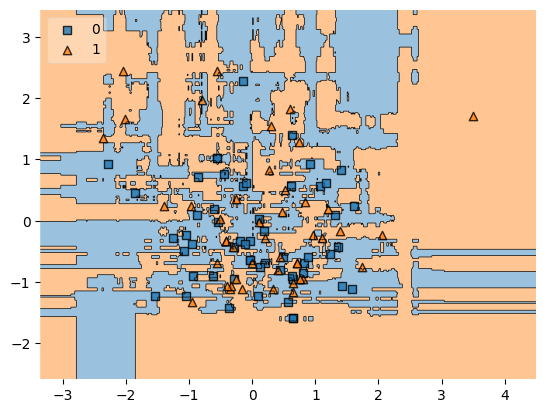

In [161]:
from sklearn.utils import resample

x_sample, y_sample = resample(
    x_train, y_train,
    n_samples=100,
    random_state=42
)

plot_decision_regions(x_sample, y_sample.values, clf=clf, legend=2)


In [158]:
import pickle

In [159]:
pickle.dump(clf, open('model.pkl', 'wb'))